# Lab 2: Pandas Groupby with Hurricane Data

Import Numpy, Pandas and Matplotlib and set the display options.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Use the following code to load a CSV file of the [NOAA IBTrACS](https://www.ncdc.noaa.gov/ibtracs/index.php?name=ibtracs-data) hurricane dataset:

In [2]:
url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.ALL.list.v04r00.csv'
df = pd.read_csv(url, parse_dates=['ISO_TIME'], usecols=range(12),
                 skiprows=[1], na_values=[' ', 'NOT_NAMED'],
                 keep_default_na=False, dtype={'NAME': str})
df.head()

SID  SEASON  NUMBER BASIN SUBBASIN NAME            ISO_TIME  \
0  1842298N11080    1842       1    NI       BB  NaN 1842-10-25 03:00:00   
1  1842298N11080    1842       1    NI       BB  NaN 1842-10-25 06:00:00   
2  1842298N11080    1842       1    NI       BB  NaN 1842-10-25 09:00:00   
3  1842298N11080    1842       1    NI       BB  NaN 1842-10-25 12:00:00   
4  1842298N11080    1842       1    NI       BB  NaN 1842-10-25 15:00:00   

  NATURE      LAT      LON  WMO_WIND  WMO_PRES  
0     NR  10.9000  80.3000       NaN       NaN  
1     NR  10.8709  79.8265       NaN       NaN  
2     NR  10.8431  79.3524       NaN       NaN  
3     NR  10.8188  78.8772       NaN       NaN  
4     NR  10.8000  78.4000       NaN       NaN

Basin Key: (NI - North Indian, SI - South Indian, WP - Western Pacific, SP - Southern Pacific, EP - Eastern Pacific, NA - North Atlantic)

How many rows does this dataset have?

In [3]:
len(df)

716165

How many North Atlantic hurricanes are in this dataset?

In [4]:
df_NA = df[df.BASIN=='NA']
len(df_NA)

126392

### 1) Get the unique values of the `BASIN`, `SUBBASIN`, and `NATURE` columns

In [5]:
df.BASIN.unique()

array(['NI', 'SI', 'NA', 'EP', 'WP', 'SP', 'SA'], dtype=object)

In [6]:
df.SUBBASIN.unique()

array(['BB', 'AS', 'MM', 'GM', 'NA', 'CS', 'WA', 'EA', 'CP'], dtype=object)

In [7]:
df.NATURE.unique()

array(['NR', 'TS', 'ET', 'SS', 'MX', 'DS'], dtype=object)

### 2) Rename the `WMO_WIND` and `WMO_PRES` columns to `WIND` and `PRES`

In [8]:
df = df.rename(columns={'WMO_WIND':'WIND', 'WMO_PRESSURE':'PRES'})

In [9]:
df.head()

SID  SEASON  NUMBER BASIN SUBBASIN NAME            ISO_TIME  \
0  1842298N11080    1842       1    NI       BB  NaN 1842-10-25 03:00:00   
1  1842298N11080    1842       1    NI       BB  NaN 1842-10-25 06:00:00   
2  1842298N11080    1842       1    NI       BB  NaN 1842-10-25 09:00:00   
3  1842298N11080    1842       1    NI       BB  NaN 1842-10-25 12:00:00   
4  1842298N11080    1842       1    NI       BB  NaN 1842-10-25 15:00:00   

  NATURE      LAT      LON  WIND  WMO_PRES  
0     NR  10.9000  80.3000   NaN       NaN  
1     NR  10.8709  79.8265   NaN       NaN  
2     NR  10.8431  79.3524   NaN       NaN  
3     NR  10.8188  78.8772   NaN       NaN  
4     NR  10.8000  78.4000   NaN       NaN

### 3) Get the 10 largest rows in the dataset by `WIND`

In [10]:
df.nlargest(n=10, columns=['WIND'])

SID  SEASON  NUMBER BASIN SUBBASIN      NAME  \
666142  2015293N13266    2015      96    EP       MM  PATRICIA   
666140  2015293N13266    2015      96    EP       MM  PATRICIA   
666144  2015293N13266    2015      96    EP       MM  PATRICIA   
427655  1980214N11330    1980      57    NA       GM     ALLEN   
178210  1935241N23291    1935      46    NA       NA       NaN   
178211  1935241N23291    1935      46    NA       NA       NaN   
178213  1935241N23291    1935      46    NA       GM       NaN   
482093  1988253N12306    1988      74    NA       CS   GILBERT   
552477  1997253N12255    1997      81    EP       MM     LINDA   
605764  2005289N18282    2005      97    NA       CS     WILMA   

                  ISO_TIME NATURE   LAT    LON   WIND  WMO_PRES  
666142 2015-10-23 12:00:00     TS  17.3 -105.6  185.0     872.0  
666140 2015-10-23 06:00:00     TS  16.5 -105.4  180.0     886.0  
666144 2015-10-23 18:00:00     TS  18.3 -105.3  180.0     878.0  
427655 1980-08-07 18:00:00     TS  21.8  -86.4  165.0     899.0  
178210 1935-09-03 00:00:00     TS  24.6  -80.5  160.0     892.0  
178211 1935-09-03 02:00:00     TS  24.8  -80.8  160.0     892.0  
178213 1935-09-03 06:00:00     TS  25.1  -81.1  160.0       NaN  
482093 1988-09-14 00:00:00     TS  19.7  -83.8  160.0     888.0  
552477 1997-09-12 06:00:00     TS  17.1 -109.6  160.0     902.0  
605764 2005-10-19 12:00:00     TS  17.3  -82.8  160.0     882.0

You will notice some names are repeated.

### 4) Group the data on `SID` and get the 10 largest hurricanes by `WIND`

In [11]:
df.groupby('SID').max().nlargest(10,  columns=['WIND'])

SEASON  NUMBER BASIN SUBBASIN      NAME            ISO_TIME  \
SID                                                                          
2015293N13266    2015      96    EP       MM  PATRICIA 2015-10-24 12:00:00   
1980214N11330    1980      57    NA       NA     ALLEN 1980-08-11 18:00:00   
1935241N23291    1935      46    NA       NA       NaN 1935-09-10 12:00:00   
1988253N12306    1988      74    NA       NA   GILBERT 1988-09-20 00:00:00   
1997253N12255    1997      81    EP       MM     LINDA 1997-09-17 18:00:00   
2005289N18282    2005      97    NA       NA     WILMA 2005-10-26 18:00:00   
2019236N10314    2019      52    NA       NA    DORIAN 2019-09-09 00:00:00   
1998295N12284    1998      89    NA       NA     MITCH 1998-11-09 18:00:00   
2005261N21290    2005      80    NA       NA      RITA 2005-09-26 06:00:00   
2009288N07267    2009      82    EP       MM      RICK 2009-10-21 20:00:00   

              NATURE   LAT       LON   WIND  WMO_PRES  
SID                                                    
2015293N13266     TS  23.2  -94.0000  185.0    1007.0  
1980214N11330     TS  28.9  -30.0000  165.0    1010.0  
1935241N23291     TS  57.0  -31.1196  160.0     996.0  
1988253N12306     TS  43.4  -54.0000  160.0    1008.0  
1997253N12255     TS  23.5 -104.7000  160.0    1007.0  
2005289N18282     TS  45.5  -52.0000  160.0    1004.0  
2019236N10314     TS  51.6  -46.4000  160.0    1011.0  
1998295N12284     TS  63.5   -5.0000  155.0    1005.0  
2005261N21290     TS  39.5  -69.9000  155.0    1009.0  
2009288N07267     TS  24.3  -92.8000  155.0    1005.0

### 5) Make a bar chart of the wind speed of the 20 strongest-wind hurricanes

Use the name on the x-axis.

In [12]:
df_grouped = df.groupby('SID').max().nlargest(20,  columns=['WIND'])

<Axes: xlabel='NAME'>

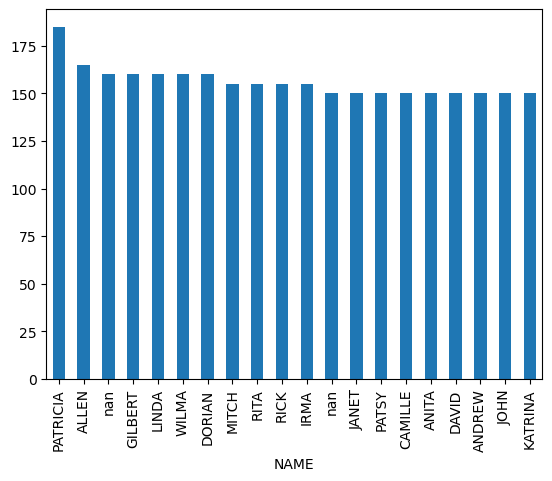

In [13]:
df_grouped.set_index('NAME').WIND.plot(kind='bar')

### 6) Plot the count of all datapoints by Basin

as a bar chart

<Axes: xlabel='BASIN'>

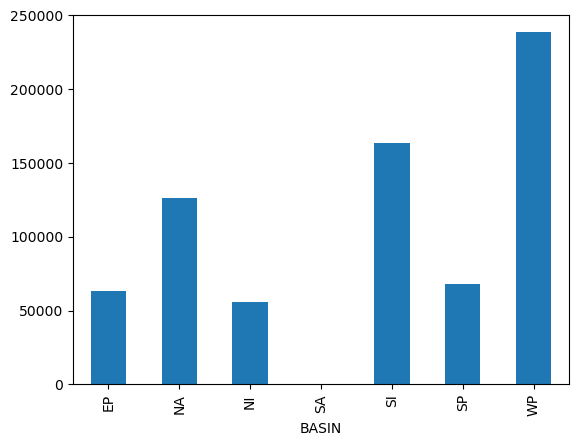

In [14]:
df.groupby('BASIN').count().NUMBER.plot(kind='bar')

### 7) Plot the count of unique hurricanes by Basin

as a bar chart.

<Axes: xlabel='BASIN'>

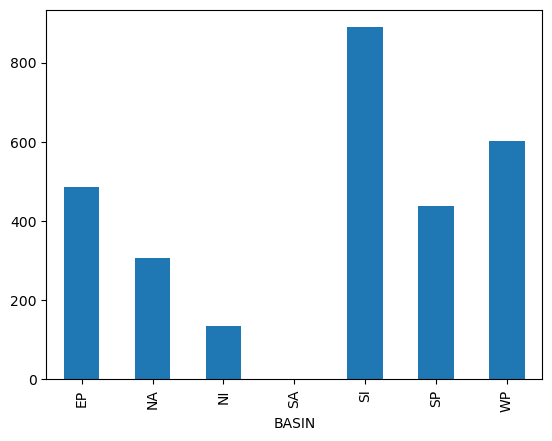

In [15]:
df.groupby('BASIN')['NAME'].nunique().plot(kind='bar')

### 8) Make a `hexbin` of the location of datapoints in Latitude and Longitude

<Axes: xlabel='LON', ylabel='LAT'>

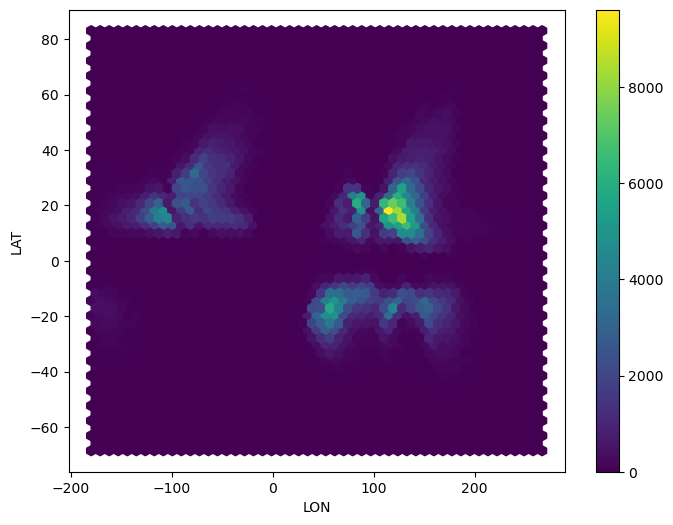

In [16]:
df.plot.hexbin(x='LON', y='LAT', gridsize=50, cmap='viridis', figsize=(8,6))

### 9) Find Hurricane Katrina (from 2005) and plot its track as a scatter plot

First find the SID of this hurricane.

In [17]:
df_KATRINA = df[(df.NAME=='KATRINA') & (df.SEASON==2005)]

In [18]:
df_KATRINA['SID'].unique()

array(['2005236N23285'], dtype=object)

Next get this hurricane's group and plot its position as a scatter plot. Use wind speed to color the points.

<Axes: xlabel='LON', ylabel='LAT'>

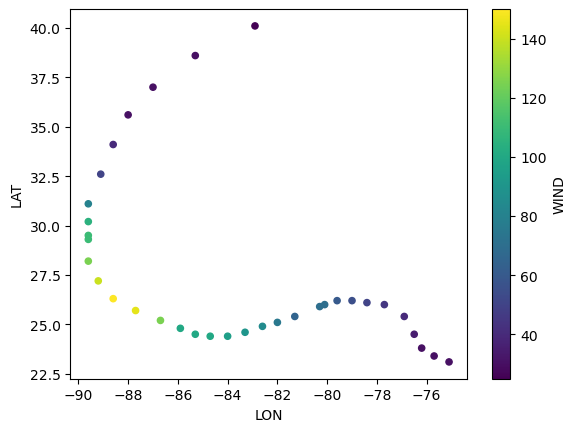

In [19]:
df_KATRINA.plot.scatter(x='LON', y='LAT', c='WIND')

### 10) Make time the index on your dataframe

In [20]:
df

SID  SEASON  NUMBER BASIN SUBBASIN   NAME  \
0       1842298N11080    1842       1    NI       BB    NaN   
1       1842298N11080    1842       1    NI       BB    NaN   
2       1842298N11080    1842       1    NI       BB    NaN   
3       1842298N11080    1842       1    NI       BB    NaN   
4       1842298N11080    1842       1    NI       BB    NaN   
...               ...     ...     ...   ...      ...    ...   
716160  2024147N19089    2024      27    NI       BB  REMAL   
716161  2024147N19089    2024      27    NI       BB  REMAL   
716162  2024147N19089    2024      27    NI       BB  REMAL   
716163  2024147N19089    2024      27    NI       BB  REMAL   
716164  2024147N19089    2024      27    NI       BB  REMAL   

                  ISO_TIME NATURE      LAT      LON  WIND  WMO_PRES  
0      1842-10-25 03:00:00     NR  10.9000  80.3000   NaN       NaN  
1      1842-10-25 06:00:00     NR  10.8709  79.8265   NaN       NaN  
2      1842-10-25 09:00:00     NR  10.8431  79.3524   NaN       NaN  
3      1842-10-25 12:00:00     NR  10.8188  78.8772   NaN       NaN  
4      1842-10-25 15:00:00     NR  10.8000  78.4000   NaN       NaN  
...                    ...    ...      ...      ...   ...       ...  
716160 2024-05-27 06:00:00     NR  23.0325  89.3509   NaN       NaN  
716161 2024-05-27 09:00:00     NR  23.3337  89.6178   NaN       NaN  
716162 2024-05-27 12:00:00     NR  23.6263  89.8799   NaN       NaN  
716163 2024-05-27 15:00:00     NR  23.9143  90.1400   NaN       NaN  
716164 2024-05-27 18:00:00     NR  24.2000  90.4000   NaN       NaN  

[716165 rows x 12 columns]

In [21]:
df_timed = df.set_index('ISO_TIME')

### 11) Plot the count of all datapoints per year as a timeseries

You should use `resample`

<Axes: xlabel='ISO_TIME'>

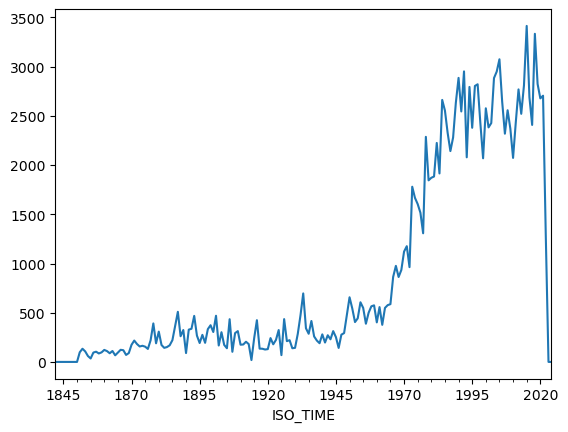

In [22]:
df_timed.WIND.resample('YE').count().plot()

### 12) Plot all tracks from the North Atlantic in 2005

You will probably have to iterate through a `GroupBy` object

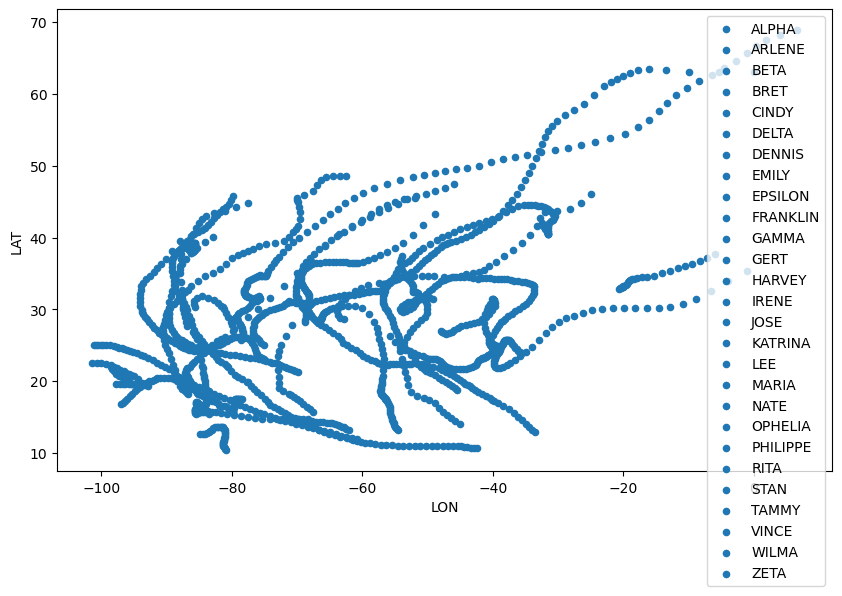

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))

for name, group in  df[ (df.BASIN=='NA') & (df.SEASON==2005)].groupby('NAME'):
    group.plot.scatter(x='LON', y='LAT', label=name, ax = ax)
plt.legend()

Hopefully at this point students have gotten an idea of what is going on and can do the rest on their own. 

### 13) Create a filtered dataframe that contains only data since 1970 from the North Atlantic ("NA") Basin

Use this for the rest of the assignment

### 14) Plot the number of datapoints per day from this filtered dataframe

Make sure you figure is big enough to actually see the plot

### 15) Calculate the climatology of datapoint counts as a function of `dayofyear`

Plot the mean and standard deviation on a single figure

### 16) Use `transform` to calculate the anomaly of daily counts from the climatology

Resample the anomaly timeseries at annual resolution and plot a line with dots as markers.

Which years stand out as having anomalous hurricane activity?